In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import pyfolio as pf

C:\Anaconda3\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
Cluster_Sectoriales = pd.read_csv('Cluster Rent Sectoriales Base 100.csv')
Cluster_Sectoriales.set_index('Date', inplace = True)
Cluster_Sectoriales.index = pd.to_datetime(Cluster_Sectoriales.index)

Cluster_Individuales = pd.read_csv('Cluster Rent Individuales Base 100.csv')
Cluster_Individuales.set_index('Date', inplace = True)
Cluster_Individuales.index = pd.to_datetime(Cluster_Individuales.index)

Cluster_Conjunto = pd.read_csv('Cluster Rent Conjuntos Base 100.csv')
Cluster_Conjunto.set_index('Date', inplace = True)
Cluster_Conjunto.index = pd.to_datetime(Cluster_Conjunto.index)


Est_Sectoriales = pd.read_csv('Rentabilidad de estrategias Sectoriales base 100.csv')
Est_Sectoriales.set_index('Date', inplace = True)
Est_Sectoriales.index = pd.to_datetime(Est_Sectoriales.index)
Est_Sectoriales = Est_Sectoriales.iloc[Est_Sectoriales.index >= Cluster_Sectoriales.index[0],:]

Est_Individuales = pd.read_csv('Rentabilidad de estrategias Individuales base 100.csv')
Est_Individuales.set_index('Date', inplace = True)
Est_Individuales.index = pd.to_datetime(Est_Individuales.index)
Est_Individuales = Est_Individuales.iloc[Est_Individuales.index >= Cluster_Sectoriales.index[0],:]

Est_Conjunto = pd.read_csv('Rentabilidad de estrategias Todas base 100.csv')
Est_Conjunto.set_index('Date', inplace = True)
Est_Conjunto.index = pd.to_datetime(Est_Conjunto.index)
Est_Conjunto = Est_Conjunto.iloc[Est_Conjunto.index >= Cluster_Sectoriales.index[0],:]

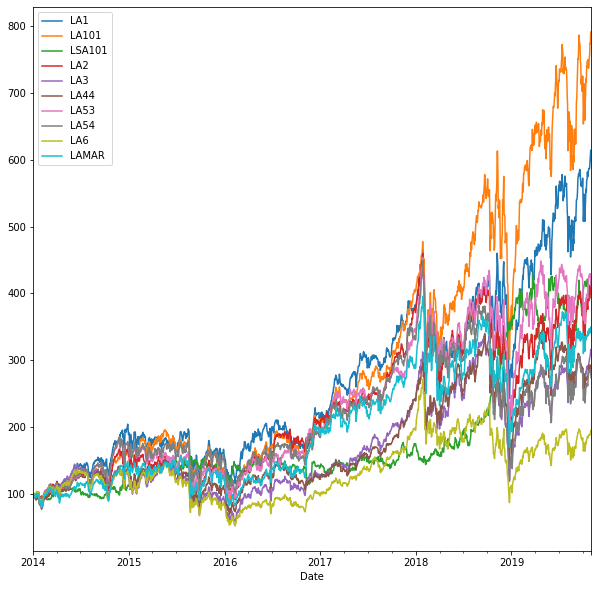

In [3]:
ja = 100*(Est_Sectoriales + 1).cumprod()
ja.plot(figsize = (10,10))

In [4]:
Bench_Sectoriales = Est_Sectoriales.sum(axis = 1)/Est_Sectoriales.shape[1]
Bench_Individuales = Est_Individuales.sum(axis = 1)/Est_Individuales.shape[1]
Bench_Conjunto = Est_Conjunto.sum(axis = 1)/Est_Conjunto.shape[1]

In [5]:
pf.timeseries.perf_stats(Bench_Sectoriales)

Annual return          0.276660
Cumulative returns     3.371798
Annual volatility      0.439394
Sharpe ratio           0.777688
Calmar ratio           0.560884
Stability              0.878189
Max drawdown          -0.493256
Omega ratio            1.151771
Sortino ratio          1.083752
Skew                  -0.442483
Kurtosis               3.339874
Tail ratio             0.967294
Daily value at risk   -0.054002
dtype: float64

Start date,2014-01-01
End date,2019-10-31
Total months,72
,Backtest
Annual return,27.7%
Cumulative returns,337.2%
Annual volatility,43.9%
Sharpe ratio,0.78
Calmar ratio,0.56
Stability,0.88
Max drawdown,-49.3%


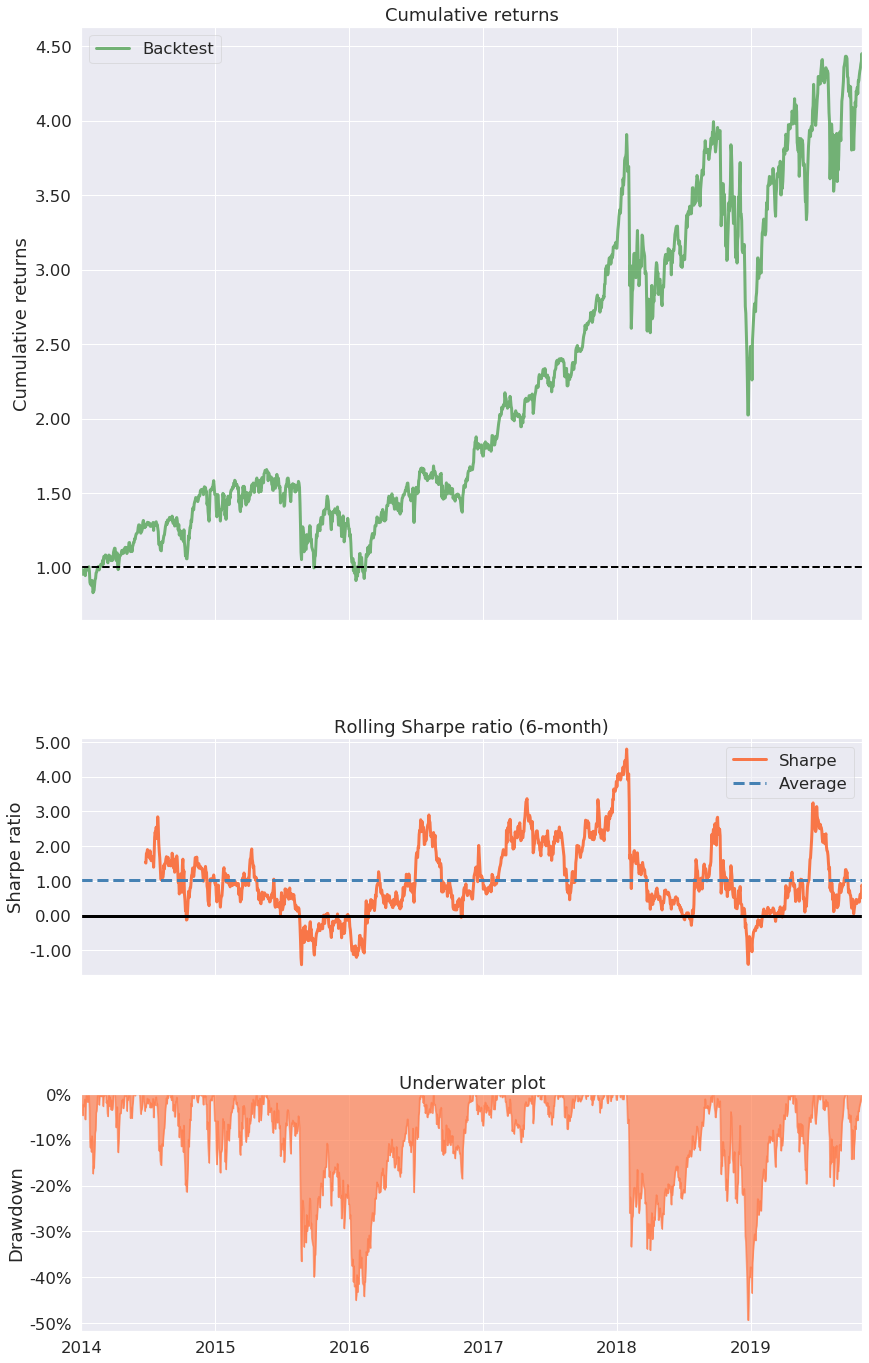

In [6]:
pf.create_simple_tear_sheet(Bench_Sectoriales)

In [7]:
pf.timeseries.perf_stats(Bench_Individuales)

Annual return          0.207982
Cumulative returns     2.130541
Annual volatility      1.072982
Sharpe ratio           0.728440
Calmar ratio           0.223896
Stability              0.607659
Max drawdown          -0.928925
Omega ratio            1.140489
Sortino ratio          1.011937
Skew                  -0.432688
Kurtosis               3.070585
Tail ratio             0.908348
Daily value at risk   -0.132081
dtype: float64

In [8]:
pf.timeseries.perf_stats(Bench_Conjunto)

Annual return          0.322495
Cumulative returns     4.445927
Annual volatility      0.665798
Sharpe ratio           0.758010
Calmar ratio           0.439861
Stability              0.841554
Max drawdown          -0.733175
Omega ratio            1.148467
Sortino ratio          1.053564
Skew                  -0.448962
Kurtosis               3.315818
Tail ratio             0.938038
Daily value at risk   -0.081880
dtype: float64

In [9]:
Resul_Clu_Sect = pd.DataFrame()
Resul_Clu_Indi = pd.DataFrame()
Resul_Clu_Conj = pd.DataFrame()

for clu in Cluster_Sectoriales.columns:
    Resul_Clu_Sect[clu] = np.round(pf.timeseries.perf_stats(Cluster_Sectoriales[clu]).dropna(),2)
    Resul_Clu_Indi[clu] = np.round(pf.timeseries.perf_stats(Cluster_Individuales[clu]).dropna(),2)
    Resul_Clu_Conj[clu] = np.round(pf.timeseries.perf_stats(Cluster_Conjunto[clu]).dropna(),2)

In [10]:
Resul_Clu_Sect

,Kshape,Kmeans,TSKM-E,Clarans,Kmedoids
Annual return,0.21,0.23,0.21,0.31,0.23
Cumulative returns,2.22,2.53,2.22,4.10,2.54
Annual volatility,0.42,0.42,0.42,0.42,0.43
Sharpe ratio,0.68,0.72,0.68,0.86,0.71
Calmar ratio,0.51,0.49,0.50,0.79,0.51
Stability,0.83,0.83,0.83,0.94,0.83
Max drawdown,-0.42,-0.48,-0.42,-0.39,-0.45
Omega ratio,1.13,1.14,1.13,1.17,1.14
Sortino ratio,0.95,0.99,0.94,1.21,0.98
Tail ratio,1.01,1.01,1.01,1.02,1.02


In [11]:
Resul_Clu_Indi

,Kshape,Kmeans,TSKM-E,Clarans,Kmedoids
Annual return,0.36,0.11,0.44,0.49,0.30
Cumulative returns,5.35,0.89,8.22,10.03,3.98
Annual volatility,1.18,1.18,1.19,1.20,1.18
Sharpe ratio,0.87,0.70,0.93,0.96,0.84
Calmar ratio,0.38,0.11,0.46,0.52,0.32
Stability,0.62,0.35,0.63,0.64,0.58
Max drawdown,-0.95,-0.97,-0.96,-0.94,-0.95
Omega ratio,1.17,1.13,1.18,1.18,1.16
Sortino ratio,1.23,0.97,1.30,1.35,1.18
Tail ratio,0.99,0.95,0.95,1.00,0.97


In [12]:
Resul_Clu_Conj

,Kshape,Kmeans,TSKM-E,Clarans,Kmedoids
Annual return,0.25,0.07,0.21,0.21,0.27
Cumulative returns,2.80,0.50,2.17,2.13,3.35
Annual volatility,0.79,0.93,0.82,0.99,0.82
Sharpe ratio,0.69,0.56,0.66,0.70,0.72
Calmar ratio,0.30,0.08,0.25,0.23,0.32
Stability,0.52,0.35,0.59,0.43,0.61
Max drawdown,-0.81,-0.89,-0.85,-0.90,-0.87
Omega ratio,1.15,1.11,1.14,1.14,1.15
Sortino ratio,0.96,0.76,0.92,0.99,1.01
Tail ratio,0.99,1.00,0.99,1.02,1.02


In [13]:
Resul_Est_Sect = pd.DataFrame()
Resul_Est_Indi = pd.DataFrame()
Resul_Est_Conj = pd.DataFrame()

for clu in Est_Sectoriales.columns:
    Resul_Est_Sect[clu] = np.round(pf.timeseries.perf_stats(Est_Sectoriales[clu]).dropna(),2)

for clu in Est_Individuales.columns:
    Resul_Est_Indi[clu] = np.round(pf.timeseries.perf_stats(Est_Individuales[clu]).dropna(),2)

for clu in Est_Conjunto.columns:
    Resul_Est_Conj[clu] = np.round(pf.timeseries.perf_stats(Est_Conjunto[clu]).dropna(),2)

In [14]:
Resul_Est_Sect

,LA1,LA101,LSA101,LA2,LA3,LA44,LA53,LA54,LA6,LAMAR
Annual return,0.34,0.41,0.27,0.25,0.21,0.19,0.26,0.18,0.11,0.23
Cumulative returns,4.99,6.80,3.23,2.93,2.11,1.87,3.11,1.74,0.92,2.46
Annual volatility,0.48,0.50,0.32,0.50,0.53,0.52,0.51,0.53,0.53,0.51
Sharpe ratio,0.86,0.93,0.90,0.71,0.62,0.60,0.72,0.58,0.47,0.66
Calmar ratio,0.72,0.74,0.94,0.44,0.32,0.33,0.47,0.25,0.17,0.40
Stability,0.89,0.90,0.76,0.85,0.66,0.75,0.85,0.68,0.38,0.83
Max drawdown,-0.48,-0.54,-0.29,-0.58,-0.65,-0.58,-0.56,-0.73,-0.68,-0.57
Omega ratio,1.16,1.18,1.17,1.13,1.12,1.11,1.14,1.11,1.09,1.13
Sortino ratio,1.20,1.32,1.38,0.99,0.87,0.83,1.01,0.81,0.65,0.91
Skew,-0.45,-0.38,0.21,-0.40,-0.36,-0.44,-0.39,-0.42,-0.33,-0.54


In [15]:
Resul_Est_Indi

,LA1,LA2,LA3,LA44,LA6,LAMAR
Annual return,0.42,-0.08,-0.17,0.23,-0.06,0.13
Cumulative returns,7.30,-0.41,-0.68,2.48,-0.33,1.07
Annual volatility,1.23,1.17,1.15,1.16,1.16,1.26
Sharpe ratio,0.92,0.52,0.42,0.77,0.54,0.75
Calmar ratio,0.45,-0.09,-0.18,0.24,-0.07,0.14
Stability,0.65,0.02,0.00,0.62,0.31,0.48
Max drawdown,-0.92,-0.96,-0.98,-0.94,-0.96,-0.93
Omega ratio,1.18,1.10,1.08,1.14,1.10,1.14
Sortino ratio,1.30,0.73,0.59,1.09,0.75,1.05
Skew,-0.34,-0.29,-0.31,-0.26,-0.40,-0.35


In [16]:
Resul_Est_Conj

,Sec_LA1,Sec_LA101,Sec_LSA101,Sec_LA2,Sec_LA3,Sec_LA44,Sec_LA53,Sec_LA54,Sec_LA6,Sec_LAMAR,Indi_LA1,Indi_LA2,Indi_LA3,Indi_LA44,Indi_LA6,Indi_LAMAR
Annual return,0.34,0.40,0.27,0.25,0.21,0.19,0.26,0.18,0.11,0.23,0.42,-0.08,-0.17,0.23,-0.06,0.13
Cumulative returns,4.99,6.80,3.23,2.93,2.11,1.87,3.11,1.74,0.92,2.46,7.30,-0.41,-0.68,2.48,-0.33,1.07
Annual volatility,0.48,0.50,0.32,0.50,0.53,0.52,0.51,0.53,0.53,0.51,1.23,1.17,1.15,1.16,1.16,1.26
Sharpe ratio,0.86,0.93,0.90,0.71,0.62,0.60,0.72,0.58,0.47,0.66,0.92,0.52,0.42,0.77,0.54,0.75
Calmar ratio,0.72,0.74,0.94,0.43,0.32,0.33,0.47,0.25,0.17,0.40,0.45,-0.09,-0.18,0.24,-0.07,0.14
Stability,0.89,0.90,0.76,0.85,0.66,0.75,0.85,0.68,0.38,0.83,0.65,0.02,0.00,0.62,0.31,0.48
Max drawdown,-0.48,-0.54,-0.29,-0.58,-0.65,-0.58,-0.56,-0.73,-0.68,-0.57,-0.92,-0.96,-0.98,-0.94,-0.96,-0.93
Omega ratio,1.16,1.18,1.17,1.13,1.12,1.11,1.14,1.11,1.09,1.13,1.18,1.10,1.08,1.14,1.10,1.14
Sortino ratio,1.20,1.32,1.38,0.99,0.87,0.83,1.01,0.81,0.65,0.91,1.30,0.73,0.59,1.09,0.75,1.05
Tail ratio,0.95,1.02,1.16,0.96,0.91,0.98,0.96,0.93,0.91,0.96,0.96,0.93,0.89,0.94,0.93,0.95


In [17]:
Sectorial = Cluster_Sectoriales['Clarans'][Cluster_Sectoriales.index >= pd.to_datetime('2014-01-31')]
Bench_Sectorial = Bench_Sectoriales[Bench_Sectoriales.index >= pd.to_datetime('2014-01-31')]

Sectorial = 100*(Sectorial + 1).cumprod()
Bench_Sectorial = 100*(Bench_Sectorial + 1).cumprod()

In [18]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=Bench_Sectorial.index,
    y=list(Bench_Sectorial),
    name="Benchmark",
    marker=dict(color='gray')
))
fig.add_trace(go.Scatter(
    x=Sectorial.index,
    y=list(Sectorial),
    name="Cluster",
    marker=dict(color='green')
))
fig.update_layout(xaxis=dict(showgrid=False,showline=True),
                  yaxis=dict(showgrid=False,showline=True),
                    #title="Plot Title",
                    plot_bgcolor='#FCFCFC',
                    yaxis_title="Valoración",
                    #xaxis_title="",
                    font=dict(
                        family="Courier New, monospace",
                        size=18,
                        color="#7f7f7f"
                    ),
                  legend=go.layout.Legend(
        x=0.05,
        y=0.9,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="white",
        bordercolor="Black",
        borderwidth=2
    )
)
iplot(fig)

In [20]:
Individual = Cluster_Individuales['Clarans'][Cluster_Individuales.index >= pd.to_datetime('2014-01-31')]
Bench_Individual = Bench_Individuales[Bench_Individuales.index >= pd.to_datetime('2014-01-31')]

Individual = 100*(Individual + 1).cumprod()
Bench_Individual = 100*(Bench_Individual + 1).cumprod()

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=Bench_Individual.index,
    y=list(Bench_Individual),
    name="Benchmark",
    marker=dict(color='gray')
))
fig.add_trace(go.Scatter(
    x=Individual.index,
    y=list(Individual),
    name="Cluster",
    marker=dict(color='green')
))
fig.update_layout(xaxis=dict(showgrid=False,showline=True),
                  yaxis=dict(showgrid=False,showline=True),
                    #title="Plot Title",
                    plot_bgcolor='#FCFCFC',
                    yaxis_title="Valoración",
                    #xaxis_title="",
                    font=dict(
                        family="Courier New, monospace",
                        size=18,
                        color="#7f7f7f"
                    ),
                  legend=go.layout.Legend(
        x=0.05,
        y=0.9,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="white",
        bordercolor="Black",
        borderwidth=2
    )
)
iplot(fig)

In [22]:
Conjunto = Cluster_Conjunto['Clarans'][Cluster_Conjunto.index >= pd.to_datetime('2014-01-31')]
Bench_Conjun = Bench_Conjunto[Bench_Conjunto.index >= pd.to_datetime('2014-01-31')]

Conjunto = 100*(Conjunto + 1).cumprod()
Bench_Conjun = 100*(Bench_Conjun + 1).cumprod()

In [23]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=Bench_Conjun.index,
    y=list(Bench_Conjun),
    name="Benchmark",
    marker=dict(color='gray')
))
fig.add_trace(go.Scatter(
    x=Conjunto.index,
    y=list(Conjunto),
    name="Cluster",
    marker=dict(color='green')
))
fig.update_layout(xaxis=dict(showgrid=False,showline=True),
                  yaxis=dict(showgrid=False,showline=True),
                    #title="Plot Title",
                    plot_bgcolor='#FCFCFC',
                    yaxis_title="Valoración",
                    #xaxis_title="",
                    font=dict(
                        family="Courier New, monospace",
                        size=18,
                        color="#7f7f7f"
                    ),
                  legend=go.layout.Legend(
        x=0.05,
        y=0.9,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="white",
        bordercolor="Black",
        borderwidth=2
    )
)
iplot(fig)